1. titanic
    - embark_town, sex => 생존율
    - 나이 displot
    - 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [27]:
titanic = sns.load_dataset('titanic')
pct = titanic.pivot_table('survived', 'embark_town', 'sex')
pct

sex,female,male
embark_town,,
Cherbourg,0.876712,0.305263
Queenstown,0.750000,0.073171
Southampton,0.689655,0.174603


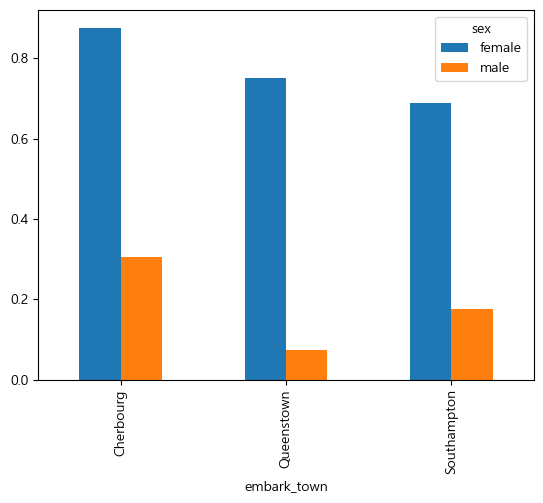

In [47]:
pct.plot(kind='bar')
plt.show()

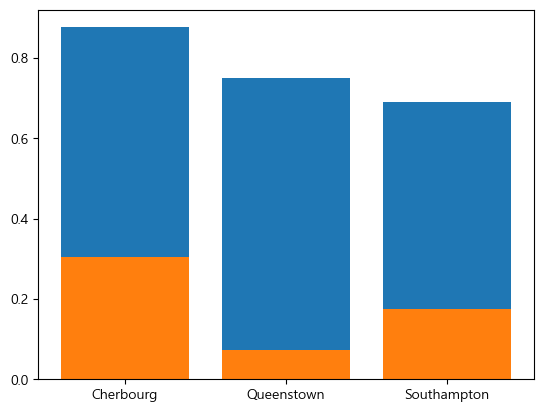

In [46]:
plt.bar(pct.index, pct.female)
plt.bar(pct.index, pct.male)
plt.show()

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. CCTV
    - 자치구 법정 순, 자치구 이름, CCTV 댓수

In [121]:
df = pd.read_csv('../data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv', encoding='euc-kr', thousands=',')
df.drop(index=0, inplace=True)
df.sort_values(by=['구분'], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,구분,총계,2013년 이전설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,강남구,7243,59,62,573,826,1295,989,744,790,923,514,468
1,강동구,3190,82,195,56,174,226,351,379,362,635,301,429
2,강북구,3321,0,21,16,68,210,4,375,963,569,298,797
3,강서구,3265,67,59,202,193,168,506,259,458,359,439,555
4,관악구,5398,362,244,302,537,607,676,662,890,404,550,164
5,광진구,3480,507,82,84,64,21,465,443,709,172,662,271
6,구로구,4693,37,361,193,269,353,563,545,794,651,684,243
7,금천구,2636,0,0,43,361,133,196,539,367,513,207,277
8,노원구,2617,77,153,75,510,329,172,216,326,387,220,152
9,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586


In [122]:
df['2020이후'] = df.iloc[:,-3:].sum(axis=1)
df['2020이전'] = df.iloc[:, 1] - df['2020이후']
df

,구분,총계,2013년 이전설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2020이후,2020이전
0,강남구,7243,59,62,573,826,1295,989,744,790,923,514,468,1905,5338
1,강동구,3190,82,195,56,174,226,351,379,362,635,301,429,1365,1825
2,강북구,3321,0,21,16,68,210,4,375,963,569,298,797,1664,1657
3,강서구,3265,67,59,202,193,168,506,259,458,359,439,555,1353,1912
4,관악구,5398,362,244,302,537,607,676,662,890,404,550,164,1118,4280
5,광진구,3480,507,82,84,64,21,465,443,709,172,662,271,1105,2375
6,구로구,4693,37,361,193,269,353,563,545,794,651,684,243,1578,3115
7,금천구,2636,0,0,43,361,133,196,539,367,513,207,277,997,1639
8,노원구,2617,77,153,75,510,329,172,216,326,387,220,152,759,1858
9,도봉구,2247,103,2,79,72,103,117,200,202,183,600,586,1369,878


In [126]:
df.iloc[:,-2]

0     1905
1     1365
2     1664
3     1353
4     1118
5     1105
6     1578
7      997
8      759
9     1369
10     703
11     817
12     592
13    1274
14    1864
15    1084
16     998
17     716
18    1022
19    2045
20    1379
21    1281
22     626
23     901
24    1777
Name: 2020이후, dtype: int64

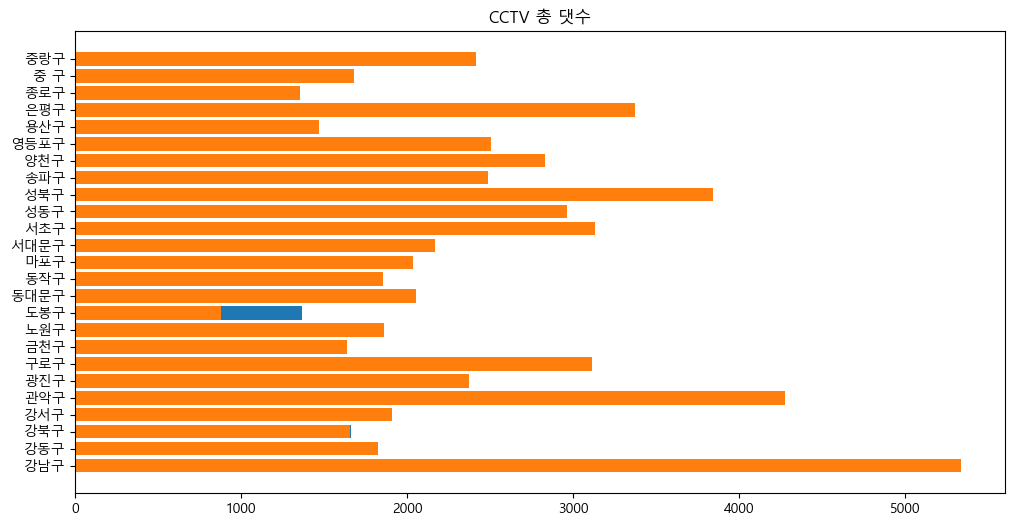

In [129]:
fig = plt.figure(figsize=(12,6))
plt.barh(df['구분'], df.iloc[:,-2]), plt.grid()
plt.barh(df['구분'], df.iloc[:,-1]), plt.grid()

sns.countplot('')
plt.title('CCTV 총 댓수')
plt.show()